In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

from sklearn.metrics import r2_score

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, MeanAbsoluteError
from keras.models import Sequential, load_model
from keras.layers import Dense 

from keras.datasets import cifar100

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 71s 0us/step


In [3]:
X_train.shape 

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

### Data Preprocessing

In [7]:
# Normalize and reeshape images 
X_train_final = X_train.reshape(-1, 32*32*3) / 255
X_test_final = X_test.reshape(-1, 32*32*3) / 255

In [8]:
X_train_final.shape

(50000, 3072)

### Modelling

In [12]:
model = Sequential()
model.add(Dense(1024, input_dim=3072, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_5 (Dense)             (None, 128)               131200    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 100)               6500      
                                                                 
Total params: 3,292,708
Trainable params: 3,292,708
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="SparseCategoricalCrossentropy", optimizer="Adam", metrics=["accuracy"])

In [14]:
result = model.fit(X_train_final, y_train, verbose=1, epochs=10, validation_data=(X_test_final, y_test))

Epoch 1/10
1563/1563 [==============================] - 166s 105ms/step - loss: 4.1926 - accuracy: 0.0545 - val_loss: 3.9901 - val_accuracy: 0.0799
Epoch 2/10
1563/1563 [==============================] - 171s 110ms/step - loss: 3.8623 - accuracy: 0.0991 - val_loss: 3.8195 - val_accuracy: 0.1081
Epoch 3/10
1563/1563 [==============================] - 248s 159ms/step - loss: 3.7174 - accuracy: 0.1246 - val_loss: 3.6903 - val_accuracy: 0.1378
Epoch 4/10
1563/1563 [==============================] - 214s 137ms/step - loss: 3.6088 - accuracy: 0.1440 - val_loss: 3.6054 - val_accuracy: 0.1560
Epoch 5/10
1563/1563 [==============================] - 246s 157ms/step - loss: 3.5256 - accuracy: 0.1611 - val_loss: 3.5398 - val_accuracy: 0.1600
Epoch 6/10
1563/1563 [==============================] - 160s 102ms/step - loss: 3.4675 - accuracy: 0.1707 - val_loss: 3.5599 - val_accuracy: 0.1574
Epoch 7/10
1563/1563 [==============================] - 172s 110ms/step - loss: 3.4209 - accuracy: 0.1797 - val_

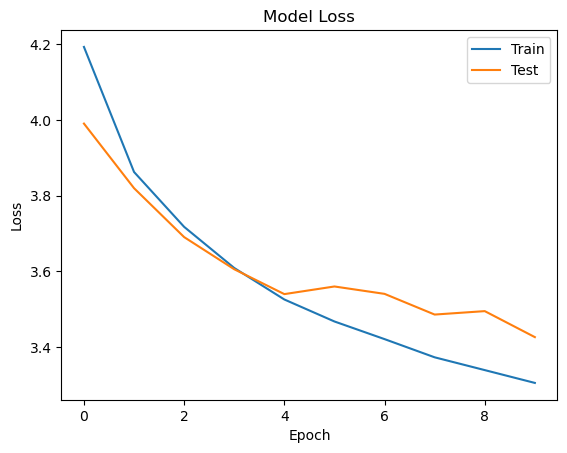

In [15]:
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

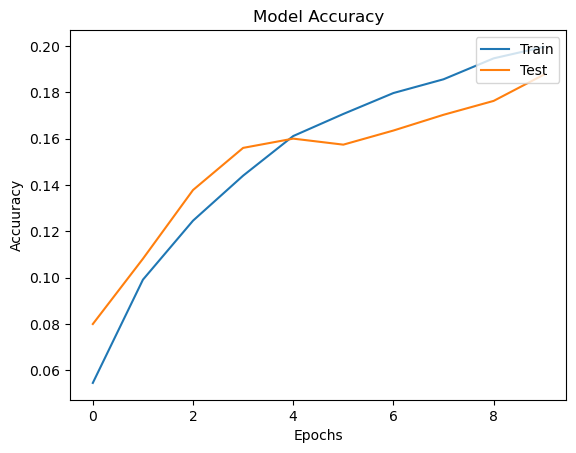

In [16]:
plt.plot(result.history["accuracy"])
plt.plot(result.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

In [17]:
model.save("models/cifar100_classification_model.h5")